[Source Code](https://jovian.ai/aakashns/sklearn-unsupervised-learning) Unsupervised Learning

The following topics are covered:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


# **Todo**

> **EXERCISE**: Perform clustering on the [Mall customers dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) on Kaggle. Study the segments carefully and report your observations.

> **EXERCISE**: ~Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).~

# **Infos**

[Cheat Sheet](https://scikit-learn.org/stable/machine_learning_map.html) to choose the right model

**Unsupervised Learning**

![](https://i.imgur.com/eyfi64y.png)

**Introduction to Unsupervised Learning**

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

**Clustering**

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a full list of unsupervised learning algorithms available in Scikit-learn: https://scikit-learn.org/stable/unsupervised_learning.html

There are several clustering algorithms in Scikit-learn. You can learn more about them and when to use them here: https://scikit-learn.org/stable/modules/clustering.html

Here are some real-world applications of clustering:

* Customer segmentation
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

# **Imports**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [110]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline

In [111]:
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans

In [112]:
%matplotlib inline
plt.style.use("seaborn-v0_8-dark")

# **Load Dataset**

In [113]:
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [114]:
X_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Visualize**

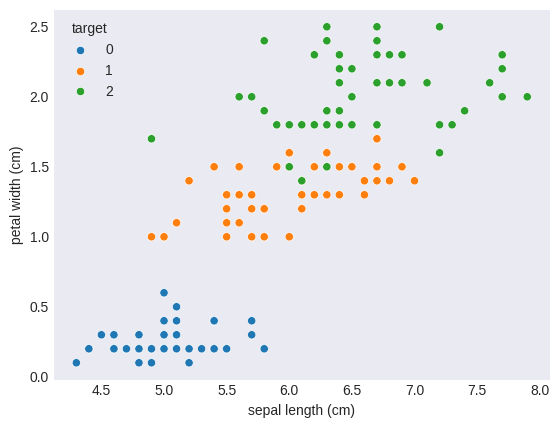

In [115]:
sns.scatterplot(data=X_iris, x="sepal length (cm)", y="petal width (cm)", hue=y_iris, palette="tab10")
plt.show()

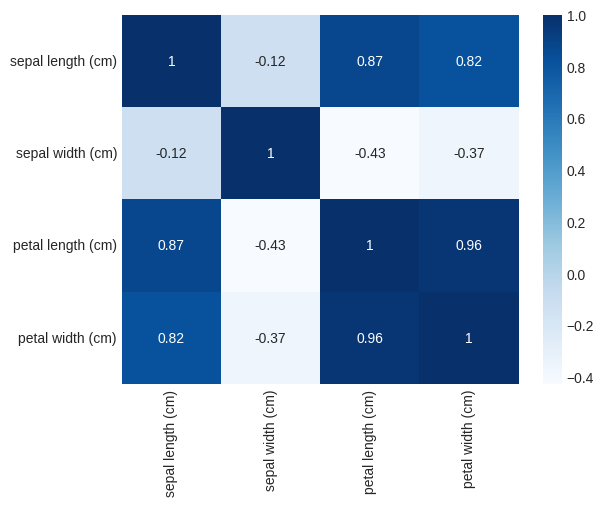

In [116]:
sns.heatmap(data=X_iris.corr(), annot=True, cmap="Blues")
plt.show()

We can drop:

* **sepal width (cm)**
* **petal length (cm)** higher correlation with sepal length (cm) than petal width (cm)

# **Preprocess**

In unsupervised learning, you don't have y_train, y_val, but you still often want to:

* **Evaluate cluster stability/generalization**

* **Tune parameters** (e.g., number of clusters) using only part of the data

* For production it's better to split to **train, val and test**

Impute and Scale

In [117]:
preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar", MinMaxScaler())
])

Split

In [118]:
# X_train, X_val = train_test_split(X_iris, test_size=0.2, random_state=42)
# X_train.shape, X_val.shape

# preprocessor.fit(X_train)

# X_train = preprocessor.transform(X_train)
# X_val = preprocessor.transform(X_val)

# X_train = pd.DataFrame(X_train, columns=X_iris.columns)
# X_val = pd.DataFrame(X_val, columns=X_iris.columns)

Without Split

In [119]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_iris), columns=X_iris.columns)

In [120]:
X_train.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667


# **K-Means**

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

**Variance** is a measurement of the spread between numbers in a data set.

Low Variance means that points are close together.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

In [121]:
model = KMeans(n_clusters=3, random_state=42)

In [122]:
model.fit(X_train)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [123]:
model.cluster_centers_

array([[0.66773504, 0.44310897, 0.7571708 , 0.78205128],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.41203704, 0.27690972, 0.55896893, 0.52083333]])

In [124]:
preds = model.predict(X_train)

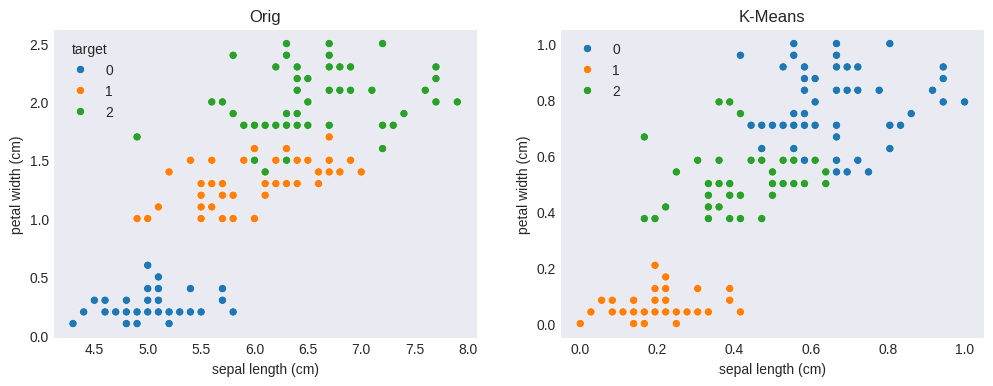

In [125]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.scatterplot(data=X_iris, x="sepal length (cm)", y="petal width (cm)", hue=y_iris, palette="tab10", ax=axes[0])
axes[0].set_title("Orig")
sns.scatterplot(data=X_train, x="sepal length (cm)", y="petal width (cm)", hue=preds, palette="tab10", ax=axes[1])
axes[1].set_title("K-Means")
plt.show()

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [126]:
model.inertia_

7.12275017294385

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

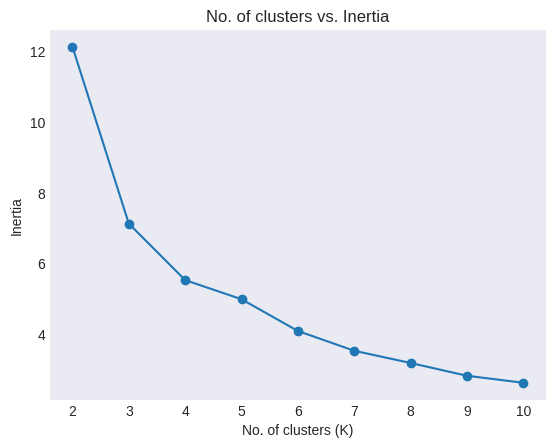

In [127]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X_train)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The most reductions is from 2 to 7 so 6 can be a good number

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

# **Mini Batch K Means**

[Comparison of the K-Means and MiniBatchKMeans clustering algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)

Perform clustering on the [Mall customers dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) on Kaggle. Study the segments carefully and report your observations.

The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans


## Load Dataset

In [128]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [129]:
mall_data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [130]:
mall_data.shape

(200, 5)

## Correlation

In [131]:
mall_data["Gender"] = mall_data["Gender"].replace({"Male": 0, "Female": 1})

<ipython-input-131-d6077628df22>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mall_data["Gender"] = mall_data["Gender"].replace({"Male": 0, "Female": 1})


[]

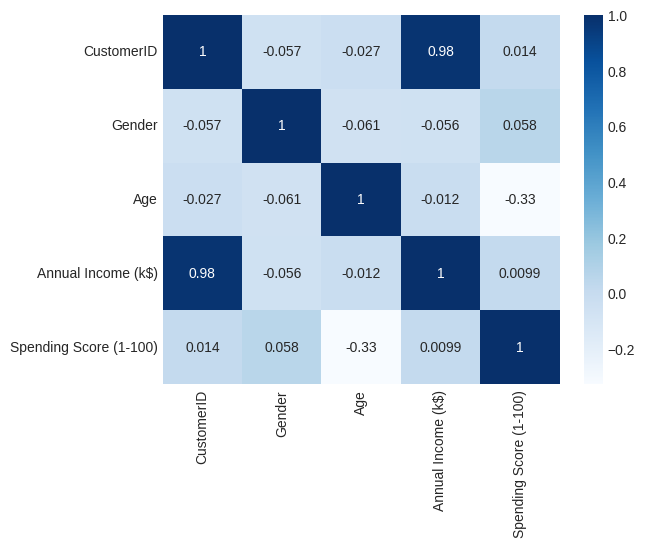

In [132]:
sns.heatmap(data=mall_data.corr(), annot=True, cmap="Blues")
plt.plot()

## Preprocess

In [133]:
preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar", MinMaxScaler())
])

X_mall = pd.DataFrame(preprocessor.fit_transform(mall_data.iloc[:, :-1]), columns=mall_data.columns[:-1])
X_mall.head(2)

,CustomerID,Gender,Age,Annual Income (k$)
0,0.000000,0.0,0.019231,0.0
1,0.005025,0.0,0.057692,0.0


## Mini Batch K Means

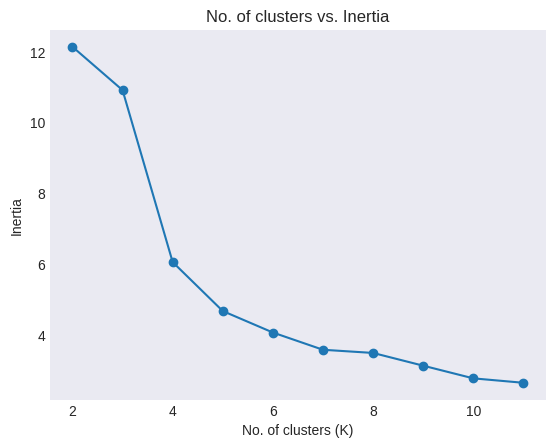

In [134]:
options = range(2,12)
inertias = []

for n_clusters in options:
    model = MiniBatchKMeans(n_clusters, random_state=42).fit(X_train)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [135]:
model = MiniBatchKMeans(n_clusters=8, random_state=42, batch_size=100)

In [136]:
preds = model.fit_predict(X_mall)

In [137]:
preds

array([3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 6, 0, 3, 3, 0, 3, 1, 0, 3, 3,
       6, 3, 6, 3, 6, 3, 0, 0, 1, 0, 1, 3, 6, 0, 6, 0, 0, 0, 6, 3, 1, 0,
       6, 0, 6, 0, 0, 0, 6, 3, 0, 1, 6, 1, 6, 1, 0, 1, 1, 3, 6, 6, 1, 3,
       6, 6, 3, 0, 1, 6, 6, 6, 1, 3, 6, 1, 5, 6, 1, 3, 1, 6, 5, 1, 6, 5,
       5, 6, 6, 3, 1, 5, 5, 3, 6, 5, 1, 3, 5, 2, 1, 3, 1, 5, 2, 1, 1, 1,
       1, 5, 5, 3, 5, 5, 2, 2, 2, 2, 4, 5, 5, 4, 5, 5, 4, 4, 1, 4, 4, 4,
       5, 5, 4, 5, 2, 4, 4, 5, 2, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 2, 5,
       2, 5, 4, 5, 4, 5, 2, 5, 4, 7, 4, 7, 4, 7, 7, 4, 4, 4, 4, 4, 2, 7,
       4, 4, 4, 4, 7, 7, 4, 7, 7, 4, 2, 4, 7, 7, 7, 7, 4, 7, 7, 7, 7, 4,
       4, 4], dtype=int32)

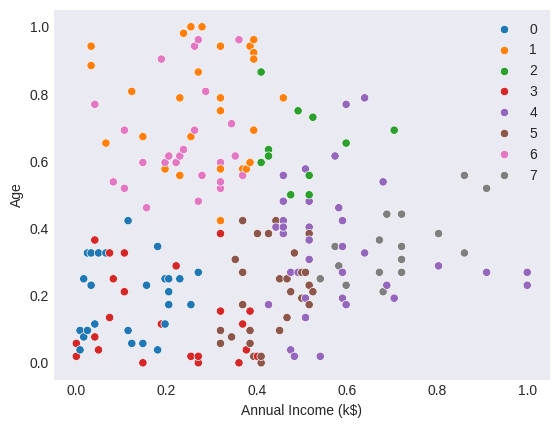

In [138]:
sns.scatterplot(x=X_mall.iloc[:, 3], y=X_mall.iloc[:, 2], hue=preds, palette="tab10")
plt.show()

## PCA & Plot

In [139]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X_mall)

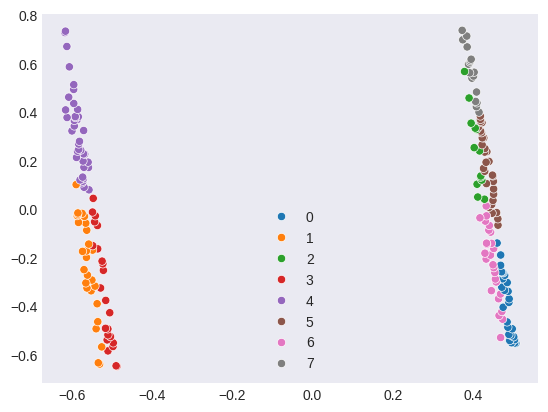

In [140]:
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=preds, palette="tab10")
plt.show()

# **DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI


In [141]:
model = DBSCAN(eps=0.125)

In [142]:
model.fit(X_train)

DBSCAN(eps=0.125)

In [143]:
# dir(model)
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        16,  17,  19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  31,
        34,  35,  36,  37,  38,  39,  40,  42,  44,  45,  46,  47,  48,
        49,  51,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,
        71,  73,  74,  75,  78,  79,  80,  82,  86,  88,  89,  90,  91,
        92,  94,  95,  96,  97,  99, 104, 111, 112, 115, 116, 120, 123,
       126, 127, 128, 137, 138, 139, 140, 141, 143, 144, 145, 147])

In [144]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  2,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  2, -1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  1, -1, -1,
        2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2])

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

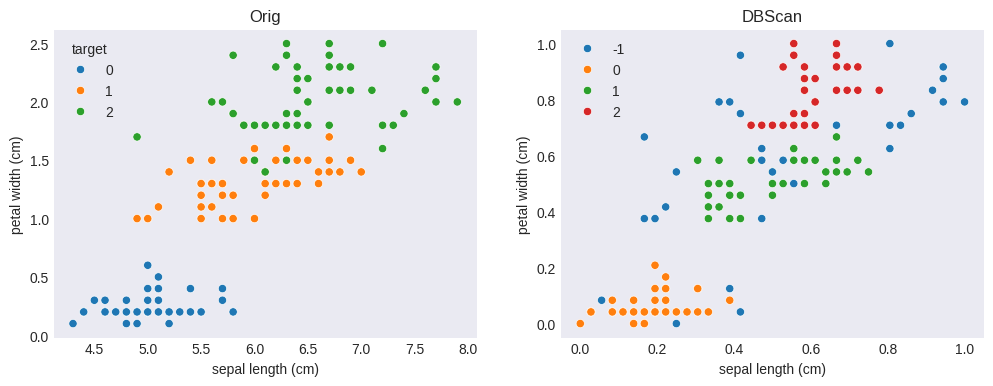

In [145]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.scatterplot(data=X_iris, x="sepal length (cm)", y="petal width (cm)", hue=y_iris, palette="tab10", ax=axes[0])
axes[0].set_title("Orig")
sns.scatterplot(data=X_train, x="sepal length (cm)", y="petal width (cm)", hue=model.labels_, palette="tab10", ax=axes[1])
axes[1].set_title("DBScan")
plt.show()

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

# **Hierarchical Clustering**

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster.
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

# **Dimensionality Reduction and Manifold Learning**




In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number.


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

## Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

In [146]:
pca = PCA(n_components=1, random_state=42)

In [147]:
petal = pca.fit_transform(X_iris.iloc[:, [2, 3]])

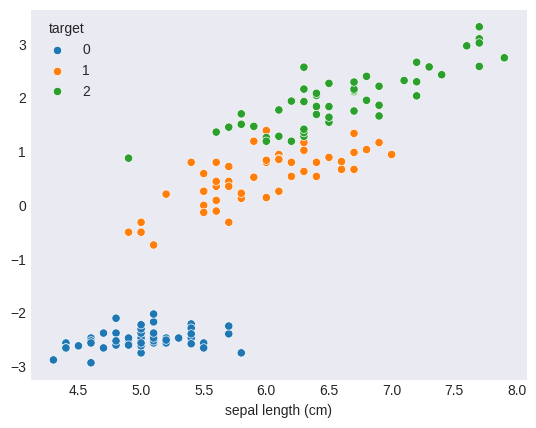

In [148]:
sns.scatterplot(data=X_iris, x="sepal length (cm)", y=petal[:, 0], hue=y_iris, palette="tab10")
plt.show()

Learn more about Principal Component Analysis here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions.

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [149]:
tsne = TSNE(n_components=2)

In [150]:
transformed = tsne.fit_transform(X_iris)

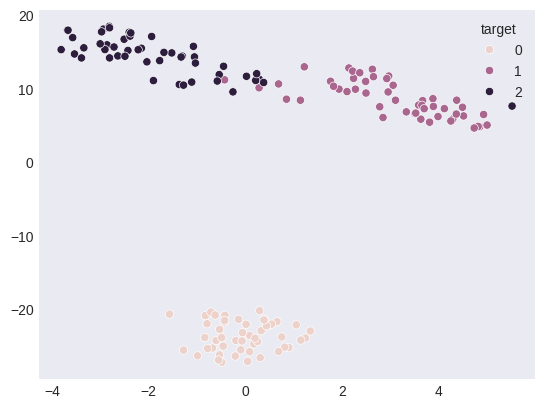

In [151]:
sns.scatterplot(x=transformed[:,1], y=transformed[:,0], hue=y_iris)
plt.show()

# **TSNE on MNIST Dataset**

## Load Dataset

In [152]:
X, y = load_digits(return_X_y=True, as_frame=True)

## Preprocess

In [153]:
preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar", MinMaxScaler())
])

X_digit = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)
X_digit.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.375,0.8125,0.625,0.000,0.0,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.6875,1.000,0.625,0.0,0.0


## Apply TSNE

In [154]:
pca = PCA(2)
pca_transformed = pca.fit_transform(X_digit)

In [155]:
tsne = TSNE(n_components=2)
tsne_transformed = tsne.fit_transform(X_digit)

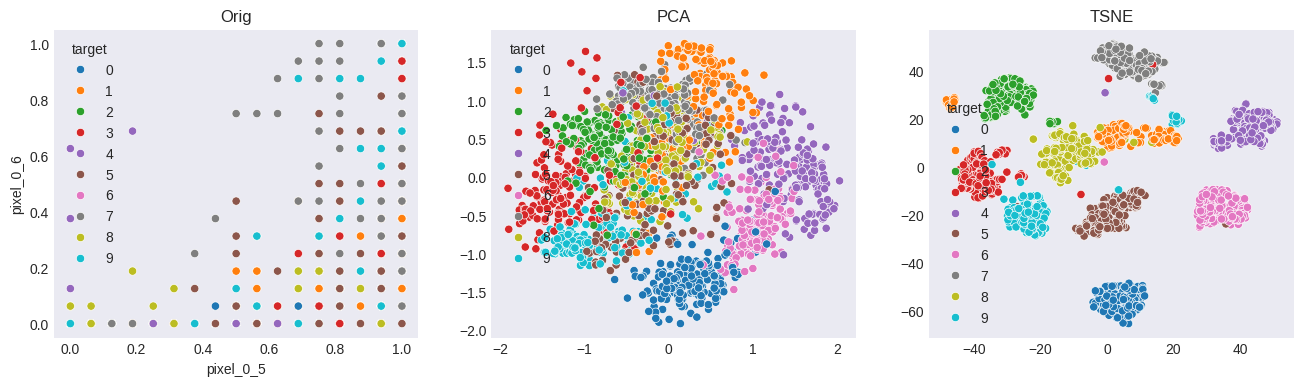

In [156]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
sns.scatterplot(x=X_digit.iloc[:, 5], y=X_digit.iloc[:, 6], hue=y, palette="tab10", ax=axes[0])
axes[0].set_title("Orig")
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=y, palette="tab10", ax=axes[1])
axes[1].set_title("PCA")
sns.scatterplot(x=tsne_transformed[:, 0], y=tsne_transformed[:, 1], hue=y, palette="tab10", ax=axes[2])
axes[2].set_title("TSNE")
plt.show()

As you can see TSNE is great for visualization

# **Summary and References**

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html